In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
from seaborn import color_palette
from tqdm import tqdm
%matplotlib inline

In [2]:
import easydarkfigs

In [3]:
%set_lightfigdir figures/
%set_darkfigdir figures_dark/

In [4]:
from dynesty import utils as dyfunc

In [5]:
from scipy.stats import norm

In [6]:
from setup_files.mocks_paper1.mock_models import models, run_names, results as res

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:657: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:656: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:663: RuntimeWarning: invalid value encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:661: RuntimeWarning: invalid value encountered in double_scalars


In [7]:
plt.style.use('cook')
light_color = [c['color'] for c in plt.rcParams['axes.prop_cycle']][0]
dark_color = [c['color'] for c in plt.rcParams['axes.prop_cycle']][2]

# Summary of Run Statistics

In [8]:
keys = list(res.keys())
n_iters = np.array([len(res[k].df) for k in keys])
n_call = np.array([res[k].df.nc.sum() for k in keys])
t_run = np.array([res[k].df.time_elapsed.max() for k in keys])
t_step = t_run * 3600. / np.array([res[k].df.nc.sum() for k in keys])
dlogz = [res[k].as_dynesty()['delta_logz'][-1] for k in keys]
finished = [dlz <= 0.1 for dlz in dlogz]
logl_max = [res[k].max_logl for k in keys]
n_eff = [sum(res[k].df.logl >= res[k].max_logl) for k in keys]
desc = [run_names[k] for k in keys]

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:657: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:656: RuntimeWarning: overflow encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:663: RuntimeWarning: invalid value encountered in double_scalars
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:661: RuntimeWarning: invalid value encountered in double_scalars


In [9]:
df_summary = pd.DataFrame(data={'t_run': t_run, 't_step': t_step, 'delta_logz': dlogz, 'finished': finished,
                                'logl_max': logl_max, 'n_iter': n_iters, 'n_call': n_call, 'n_eff':n_eff, 'desc': desc}, index=keys)

In [10]:
df_summary[~df_summary.finished]

t_run    t_step  delta_logz  finished  logl_max  n_iter  \
mock_11  102.491667  7.116928    0.820644     False       NaN   10879   
mock_47  111.002778  1.987842    0.692856     False    -211.7   12507   
mock_48  115.677778  2.067839    1.098809     False    -251.6   10706   
mock_49  121.838889  2.180182   12.583445     False    -136.1   10283   
mock_51  111.500000  1.997005    0.197218     False    -656.9   14612   
mock_52  113.658333  2.035145    8.113640     False    -552.9   12287   
mock_53  120.405556  2.154984    1.098809     False    -513.3   10830   
mock_54  133.283333  2.386713    0.405648     False   -1118.0    9717   

           n_call  n_eff                                               desc  
mock_11   51844.0      0            Tau-MDF Model (Distance Free, Nim=1024)  
mock_47  201027.0      2           NonParam Model (Distance Free, Npix=1e4)  
mock_48  201389.0      1           NonParam Model (Distance Free, Npix=1e5)  
mock_49  201185.0      0           NonParam Model (Distance Free, Npix=1e6)  
mock_51  201001.0      8  NonParam Model (Distance Free, Npix=1e3, Const...  
mock_52  201052.0      0  NonParam Model (Distance Free, Npix=1e4, Const...  
mock_53  201143.0      1  NonParam Model (Distance Free, Npix=1e5, Const...  
mock_54  201038.0      4  NonParam Model (Distance Free, Npix=1e6, Const...

In [11]:
df_summary[df_summary.finished]

t_run    t_step    delta_logz  finished     logl_max  \
mock_1        98.569444  1.414596  1.208058e-06      True  -1040.45000   
mock_2        98.169444  1.409249  2.558040e-07      True    -80.98810   
mock_3        99.016667  1.422863  7.364826e-06      True   -942.91300   
mock_4        98.327778  1.411162  5.184347e-09      True   -410.91400   
mock_5       166.955556  4.060999  1.579532e-06      True  -1021.51000   
mock_6       166.177778  4.652631  1.107271e-06      True  -1020.64000   
mock_7       167.058333  3.993532  3.819353e-06      True  -1010.67000   
mock_8       146.497222  2.499337  2.338378e-05      True   -982.67500   
mock_9        60.227778  1.439049  1.392664e-06      True  -1040.63000   
mock_10      160.130556  2.297746  2.108338e-06      True   -933.11700   
mock_12      121.691667  2.906012  5.722313e-09      True  -1086.93000   
mock_13      121.625000  2.906714  5.441052e-10      True  -1081.65000   
mock_14      102.138889  1.458635  2.000332e-07      True   -126.04200   
mock_15       86.025000  1.228855  2.171419e-09      True  -1460.95000   
mock_16       83.388889  1.196722  3.175501e-09      True  -2788.82000   
mock_17       88.625000  1.266780  5.456968e-11      True -11977.50000   
mock_18      131.566667  3.242000  3.375838e-05      True   -998.30800   
mock_19      135.119444  3.227418  1.087805e-05      True   -980.82100   
mock_20       85.250000  3.168621  3.408125e-05      True  -1018.41000   
mock_21      102.341667  3.296382  2.744399e-05      True   -989.13300   
mock_22      109.227778  3.318900  2.880916e-06      True  -1017.43000   
mock_23      145.283333  3.474916  8.976541e-06      True   -984.11200   
mock_24       90.044444  3.450897  3.674605e-05      True   -998.43200   
mock_25      102.222222  2.943435  3.563903e-04      True   -406.80500   
mock_26      123.850000  2.961364  1.700998e-06      True   -162.91500   
mock_27       37.591667  2.713764  1.573480e-04      True   -210.83100   
mock_28       46.488889  2.879114  2.539882e-03      True    -83.63350   
mock_29      137.808333  3.293961  1.349293e-06      True   -422.23100   
mock_30      133.366667  3.179287  1.738219e-05      True  -2946.29000   
mock_31      132.208333  3.160631  7.373104e-05      True   -398.32800   
...                 ...       ...           ...       ...          ...   
mock_35      140.469444  3.355451  2.980996e-06      True  -1000.71000   
mock_36      139.608333  3.316397  3.431579e-07      True  -1004.77000   
mock_37      136.919444  3.269827  2.521812e-06      True  -1032.16000   
mock_38      138.036111  3.299537  4.039134e-06      True   -971.59600   
mock_39      137.063889  3.278365  2.428285e-07      True  -1143.61000   
mock_40      137.058333  3.277753  1.026618e-06      True   -990.05800   
mock_41       89.802778  2.144302  1.545848e-06      True  -1603.48000   
mock_42      100.841667  2.409438  1.407579e-05      True   -563.22800   
mock_43       63.286111  1.509048  3.714452e-05      True   -127.12000   
mock_44       63.066667  1.507720  4.165303e-04      True    -22.84330   
mock_45       20.880000  2.142515  7.632484e-04      True     -2.95135   
mock_46      165.072222  1.967716  1.864248e-02      True   -380.90000   
mock_50      169.663889  2.437116  1.005181e-05      True  -1194.31000   
mock_55       61.055556  1.460213  9.352204e-07      True  -1543.73000   
mock_56       67.263889  1.608329  8.654045e-06      True   -590.62500   
mock_57       62.466667  1.491177  1.654104e-05      True   -130.00100   
mock_58       22.625833  1.448285  1.609216e-04      True    -24.20890   
mock_59       13.226111  1.586499  6.872341e-04      True    -10.18380   
mock_60      123.502778  2.214822  2.184546e-05      True  -7223.13000   
mismatch_1    90.866667  2.170958  2.685683e-05      True   -975.35900   
mismatch_2    53.952778  0.771624  2.079515e-05      True   -961.17500   
mismatch_3    91.002778  2.171616  1.014376e-05      True   -994.40200   
mismatch_4    61.65000

# Figure 4 - Corner Plots

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Corner.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Corner_dark.pdf


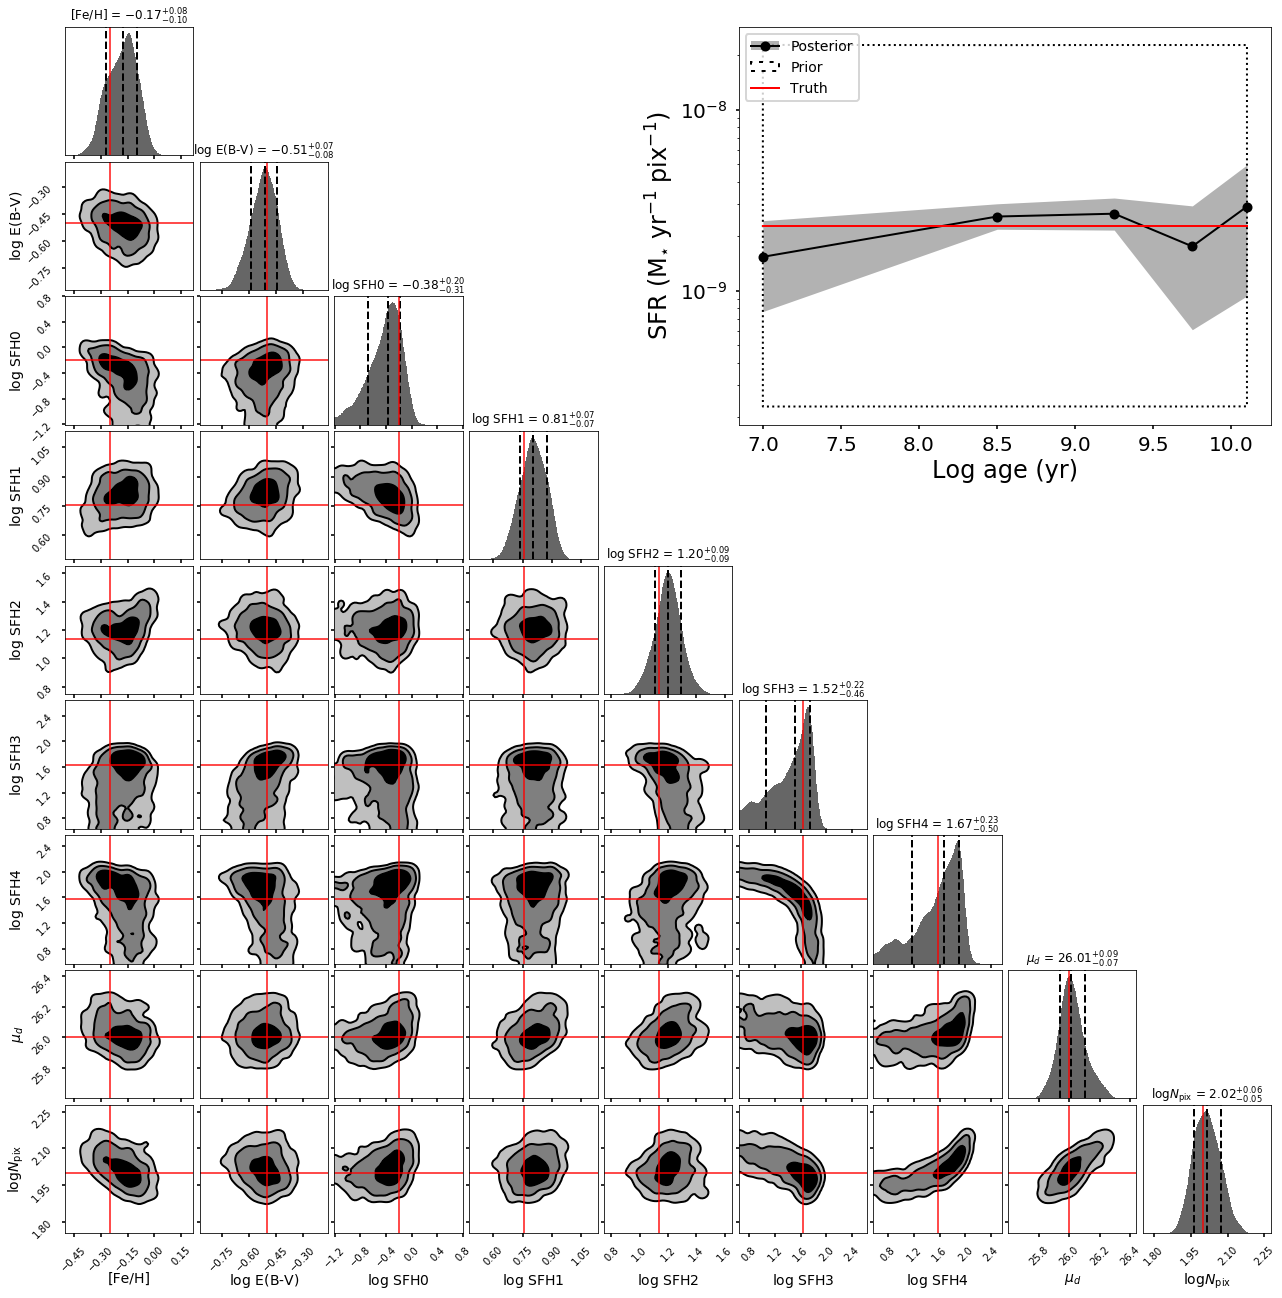

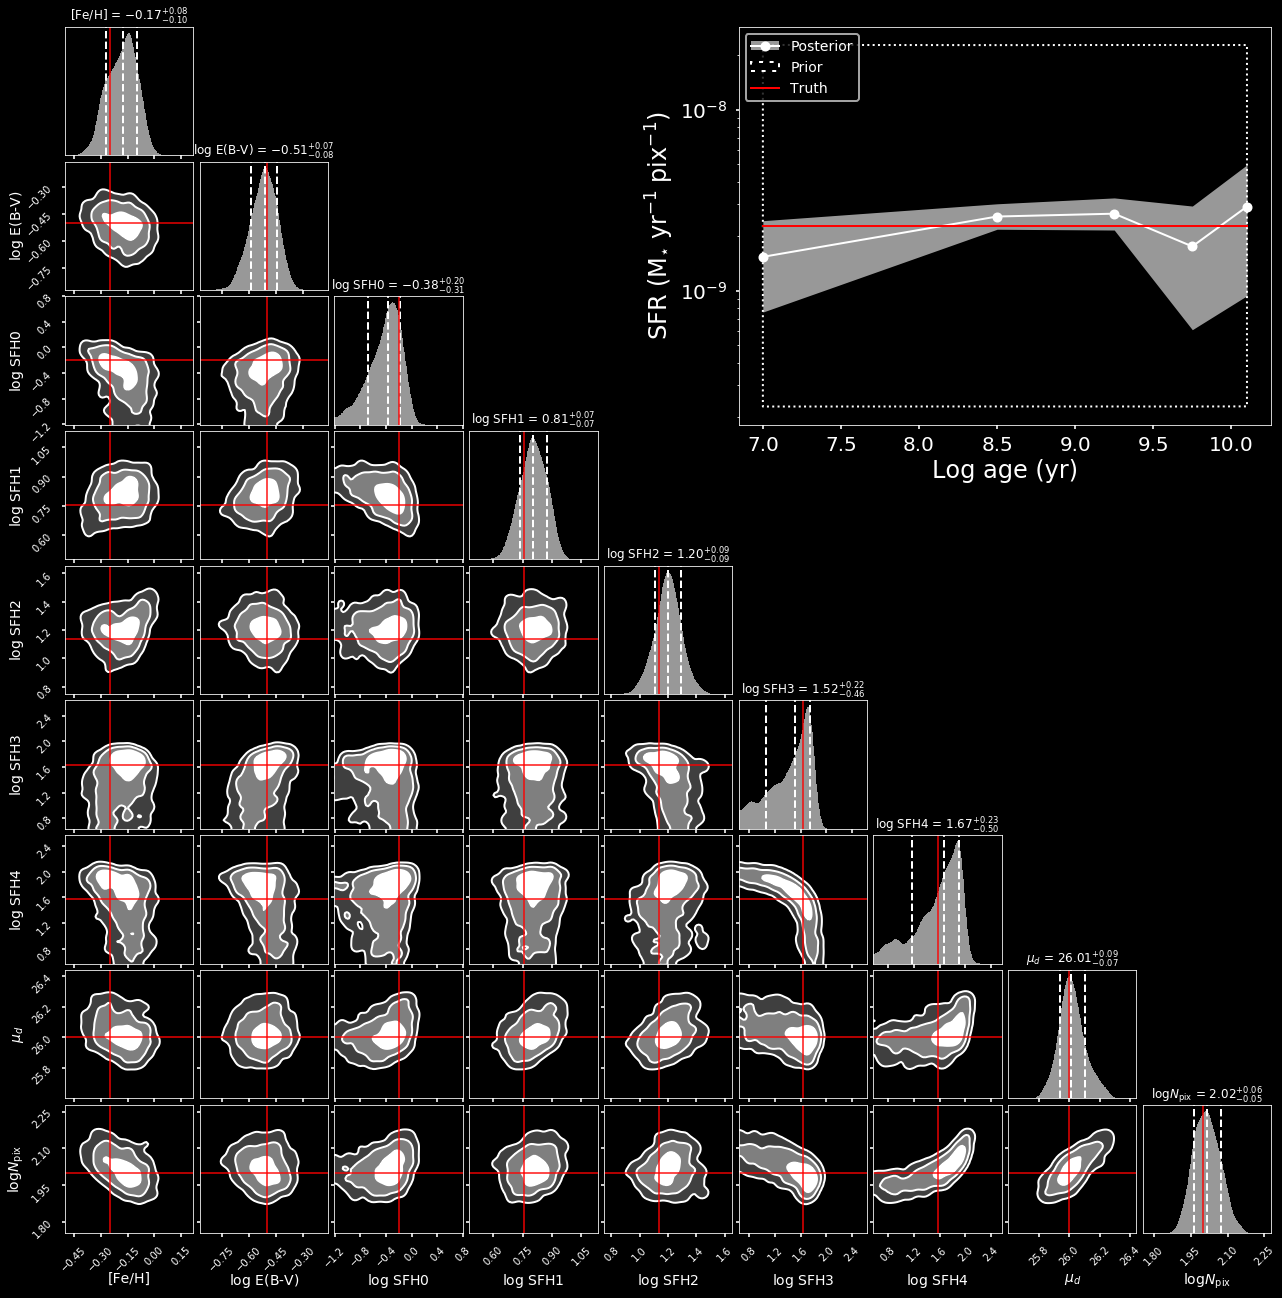

In [29]:
%%savefig_dark_light paper1/Corner.pdf
r = res['mock_50']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=24)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=24)
plt.setp(axbig.get_xticklabels(), fontsize=20)
plt.setp(axbig.get_yticklabels(), fontsize=20)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Corner_tau.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Corner_tau_dark.pdf


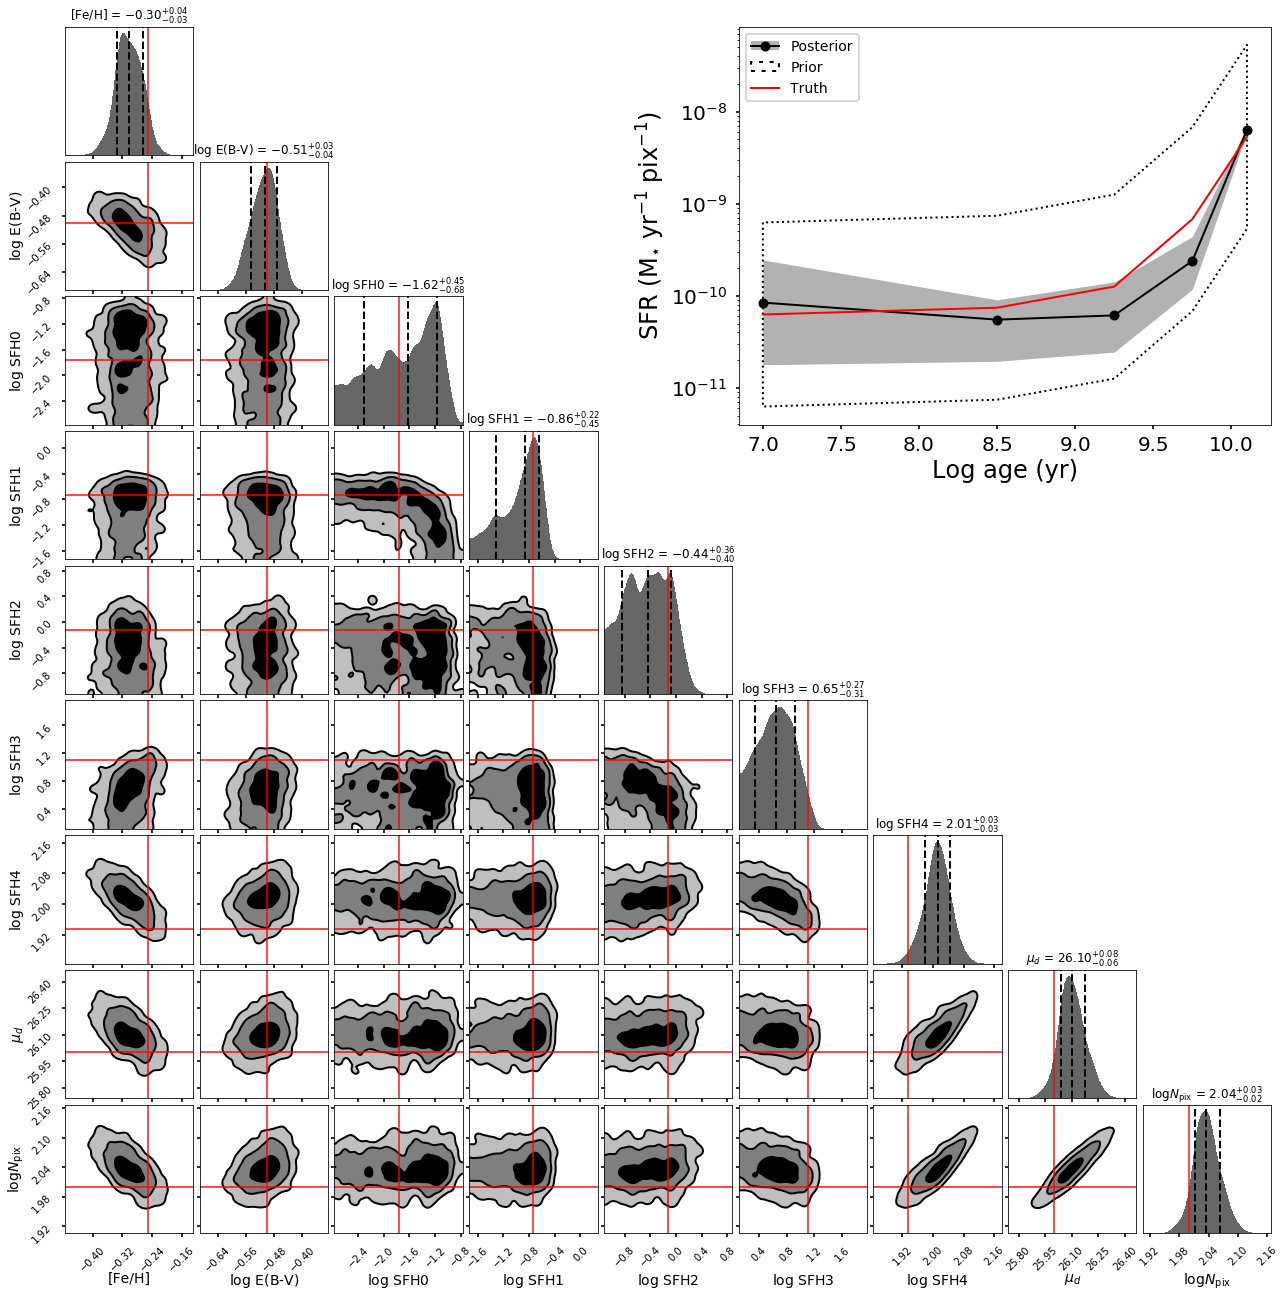

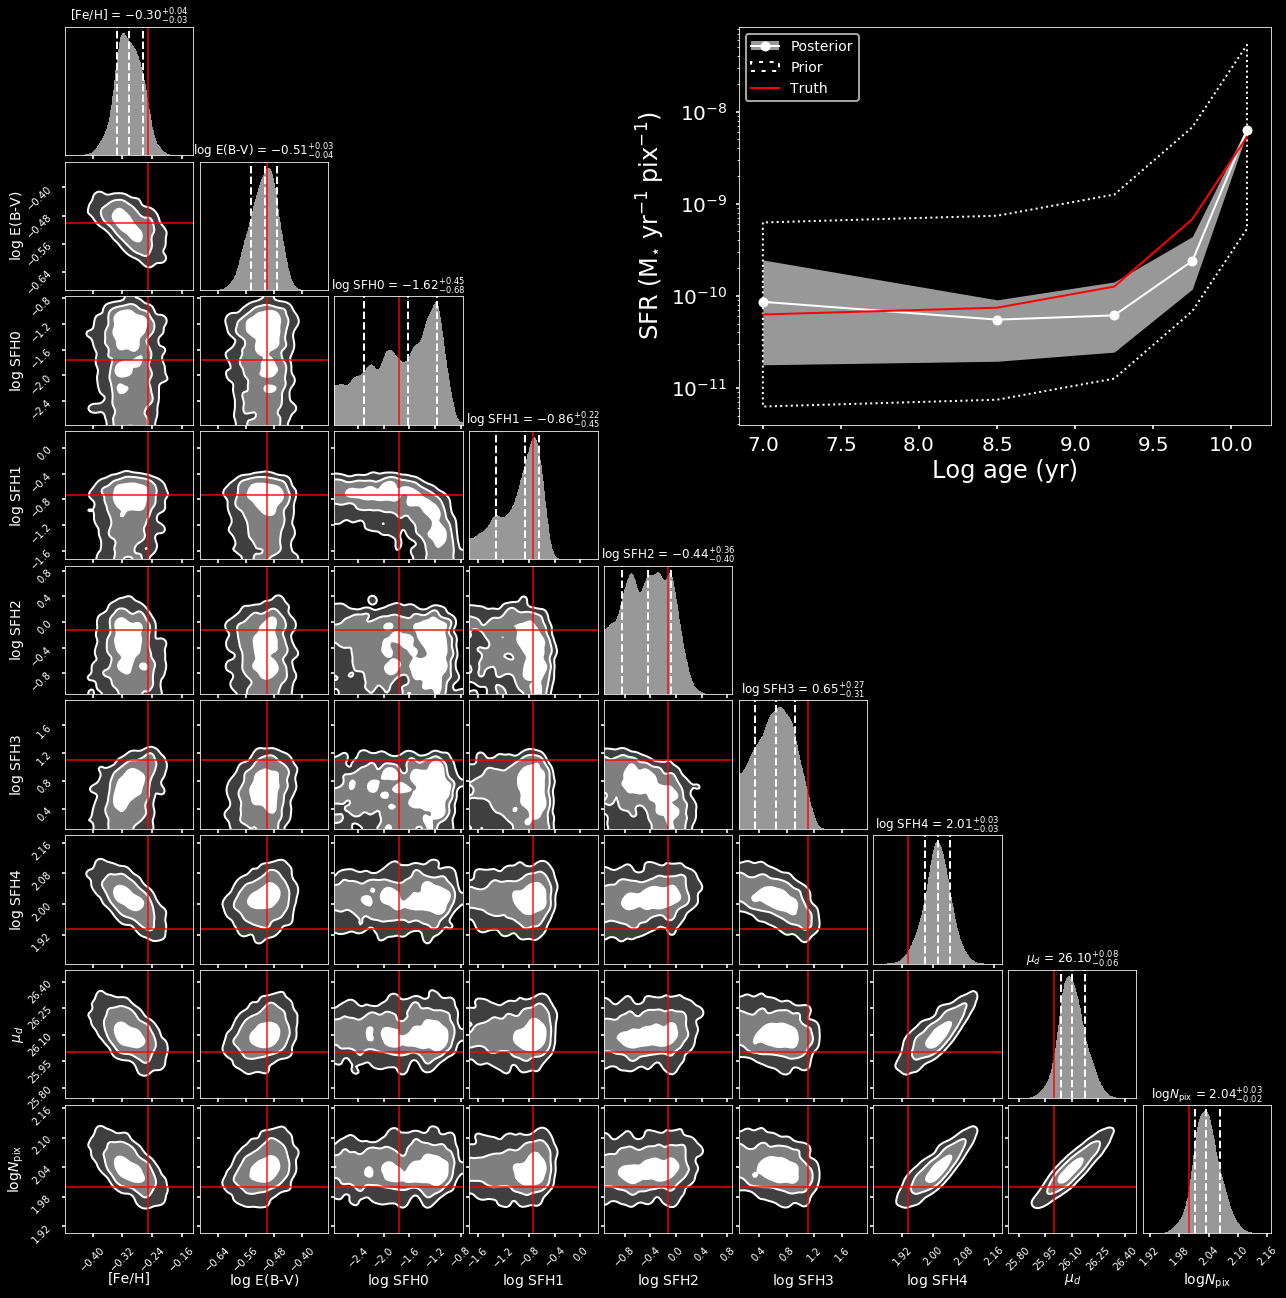

In [30]:
%%savefig_dark_light paper1/Corner_tau.pdf
r = res['mock_8']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=24)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=24)
plt.setp(axbig.get_xticklabels(), fontsize=20)
plt.setp(axbig.get_yticklabels(), fontsize=20)

# Figure 4b - SFH of many runs

In [12]:
df_summary.loc[['mock_50', 'mock_51', 'mock_52', 'mock_53', 'mock_54']]

t_run    t_step  delta_logz  finished  logl_max  n_iter  \
mock_50  169.663889  2.437116    0.000010      True  -1194.31   11096   
mock_51  111.500000  1.997005    0.197218     False   -656.90   14612   
mock_52  113.658333  2.035145    8.113640     False   -552.90   12287   
mock_53  120.405556  2.154984    1.098809     False   -513.30   10830   
mock_54  133.283333  2.386713    0.405648     False  -1118.00    9717   

           n_call  n_eff                                               desc  
mock_50  250620.0   3145  NonParam Model (Distance Free, Npix=1e2, Const...  
mock_51  201001.0      8  NonParam Model (Distance Free, Npix=1e3, Const...  
mock_52  201052.0      0  NonParam Model (Distance Free, Npix=1e4, Const...  
mock_53  201143.0      1  NonParam Model (Distance Free, Npix=1e5, Const...  
mock_54  201038.0      4  NonParam Model (Distance Free, Npix=1e6, Const...

In [13]:
res['mock_52'].max_logl = -620
res['mock_53'].max_logl = -640

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


In [14]:
df_summary.loc[['mock_8', 'mock_46', 'mock_47', 'mock_48',  'mock_49']]

t_run    t_step  delta_logz  finished  logl_max  n_iter  \
mock_8   146.497222  2.499337    0.000023      True  -982.675   10189   
mock_46  165.072222  1.967716    0.018642      True  -380.900   32080   
mock_47  111.002778  1.987842    0.692856     False  -211.700   12507   
mock_48  115.677778  2.067839    1.098809     False  -251.600   10706   
mock_49  121.838889  2.180182   12.583445     False  -136.100   10283   

           n_call  n_eff                                      desc  
mock_8   211012.0   2703            NonParam Model (Distance Free)  
mock_46  302005.0     59  NonParam Model (Distance Free, Npix=1e3)  
mock_47  201027.0      2  NonParam Model (Distance Free, Npix=1e4)  
mock_48  201389.0      1  NonParam Model (Distance Free, Npix=1e5)  
mock_49  201185.0      0  NonParam Model (Distance Free, Npix=1e6)

In [15]:
res['mock_47'].max_logl = -250.
res['mock_48'].max_logl = -350.

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/SFH_many_narrow.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/SFH_many_narrow_dark.pdf


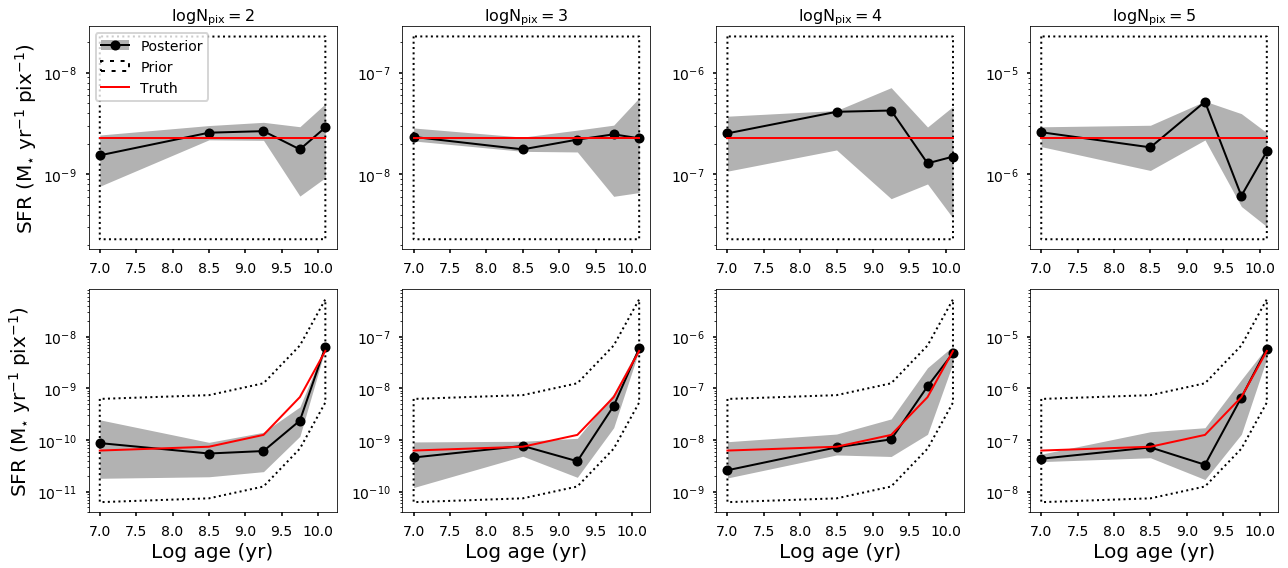

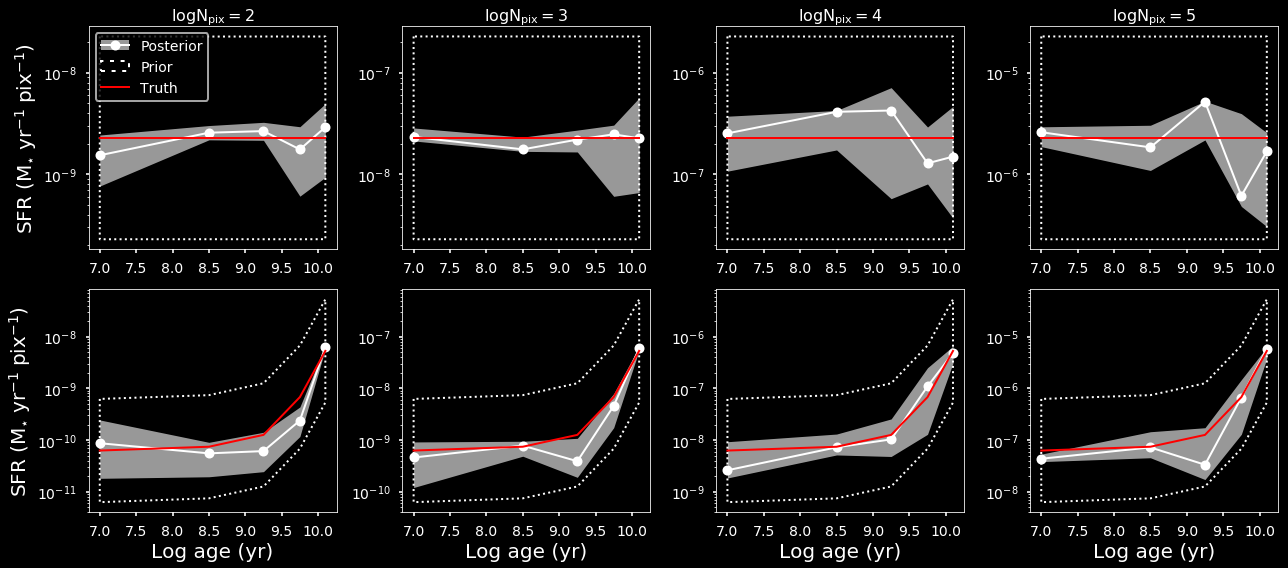

In [31]:
%%savefig_dark_light paper1/SFH_many_narrow.pdf
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(18, 8), sharey=False, sharex=False)
for a, k in zip(axes[0], ['mock_50', 'mock_51', 'mock_52', 'mock_53']):
    r = res[k]
    r.plot_sfr(ax=a, all_ages=False, error_kwargs={'alpha': 0.}, legend=(k == 'mock_50'))
for a, k in zip(axes[1], ['mock_8', 'mock_46', 'mock_47', 'mock_48']):
    r = res[k]
    r.plot_sfr(ax=a, all_ages=False, error_kwargs={'alpha': 0.}, legend=False)
for a, Npix in zip(axes[0], [2., 3., 4., 5.]):
    a.set_title(r'$\log\mathrm{N_{pix}} = $' + f'{Npix:.0f}')
for i, a in enumerate(axes.flatten()):
    plt.setp(a.get_xticklabels(), visible=True, fontsize=14)
    plt.setp(a.get_yticklabels(), visible=True, fontsize=14)
    if i not in [0, 4]:
        a.set_ylabel('')
    else:
        a.set_ylabel(a.get_ylabel(), fontsize=20)
    if i not in [4,5,6,7]:
        a.set_xlabel('')
    else:
        a.set_xlabel(a.get_xlabel(), fontsize=20)
#     a.set_ylim([])
plt.tight_layout()

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/SFH_many.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/SFH_many_dark.pdf


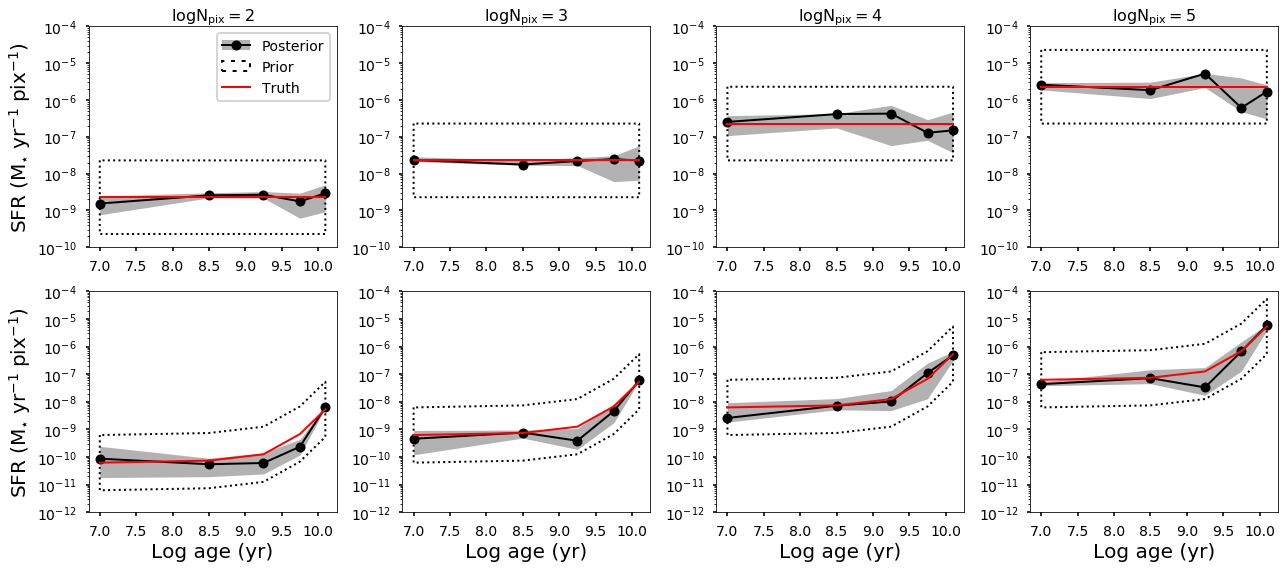

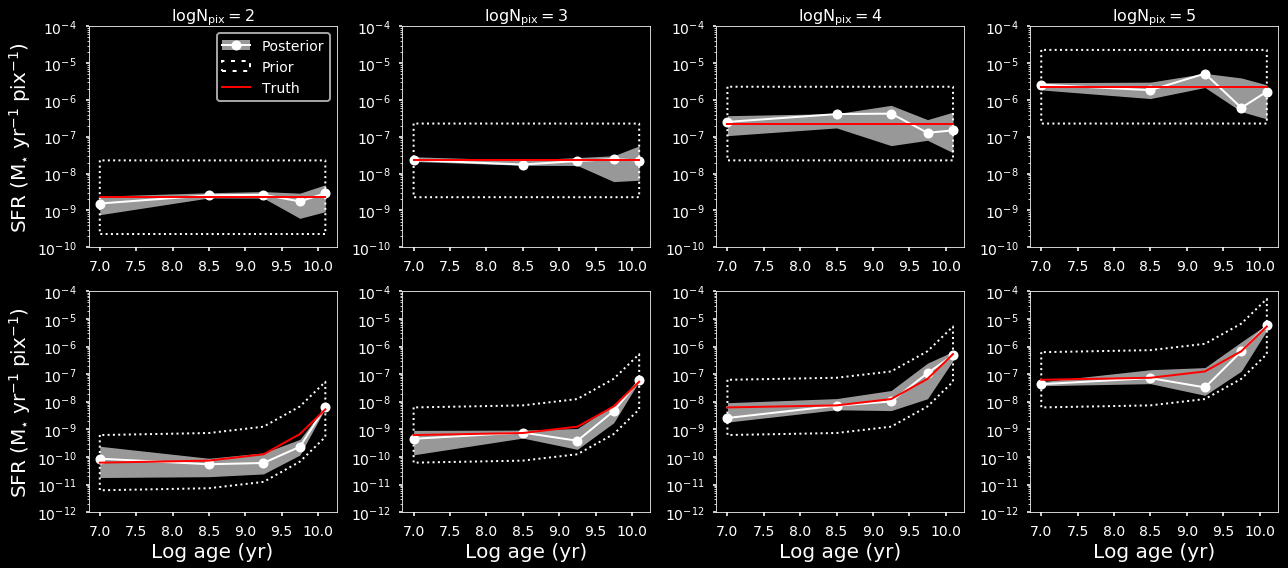

In [33]:
%%savefig_dark_light paper1/SFH_many.pdf
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(18, 8), sharey=False, sharex=False)
for a, k in zip(axes[0], ['mock_50', 'mock_51', 'mock_52', 'mock_53']):
    r = res[k]
    r.plot_sfr(ax=a, all_ages=False, error_kwargs={'alpha': 0.}, legend=(k == 'mock_50'))
for a, k in zip(axes[1], ['mock_8', 'mock_46', 'mock_47', 'mock_48']):
    r = res[k]
    r.plot_sfr(ax=a, all_ages=False, error_kwargs={'alpha': 0.}, legend=False)
for a, Npix in zip(axes[0], [2., 3., 4., 5.]):
    a.set_title(r'$\log\mathrm{N_{pix}} = $' + f'{Npix:.0f}')
for i, a in enumerate(axes.flatten()):
    plt.setp(a.get_xticklabels(), visible=True, fontsize=14)
    plt.setp(a.get_yticklabels(), visible=True, fontsize=14)
    if i not in [0, 4]:
        a.set_ylabel('')
    else:
        a.set_ylabel(a.get_ylabel(), fontsize=20)
    if i not in [4,5,6,7]:
        a.set_xlabel('')
    else:
        a.set_xlabel(a.get_xlabel(), fontsize=20)
    if i < 4:
        a.set_ylim([1e-10, 1e-4])
    else:
        a.set_ylim([1e-12, 1e-4])
plt.tight_layout()

# Figure 5 - Model Choices

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


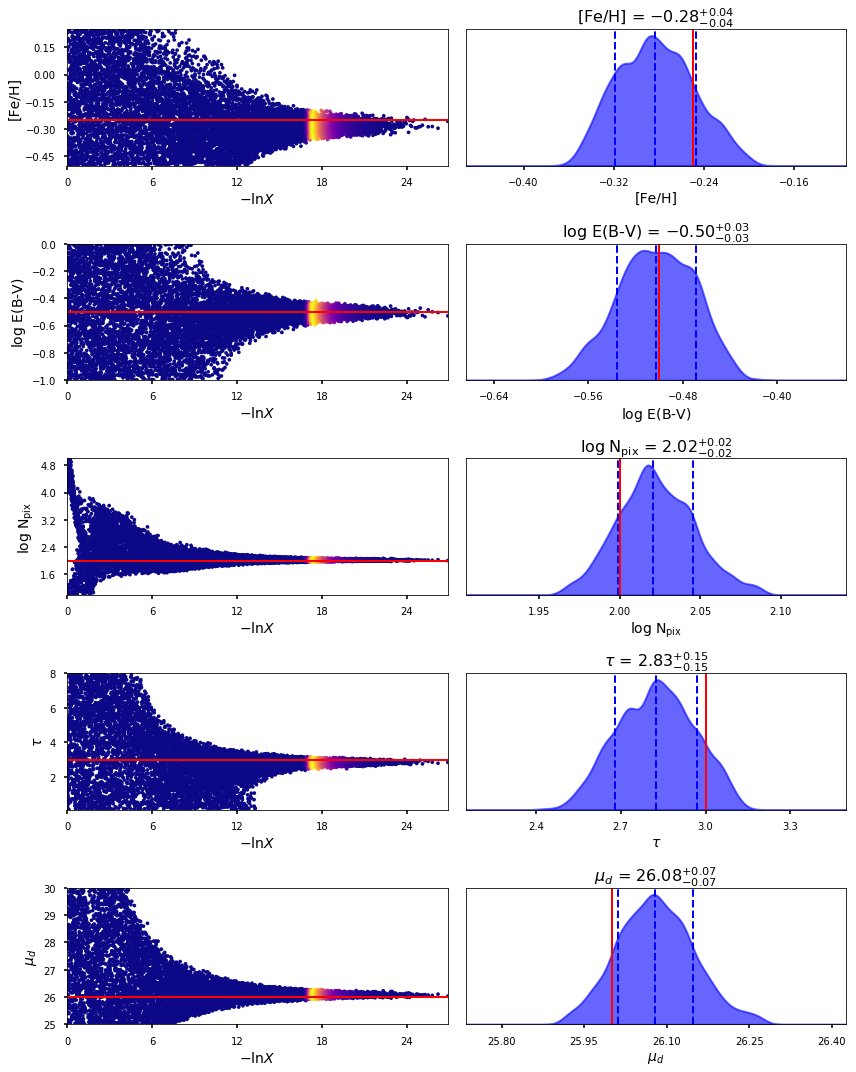

In [25]:
res['mock_11'].plot_trace(max_logl=-1000.);
plt.tight_layout()

In [26]:
res['mock_11'].max_logl = -950.

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/ModelChoices.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/ModelChoices_dark.pdf


<Figure size 1440x720 with 0 Axes>

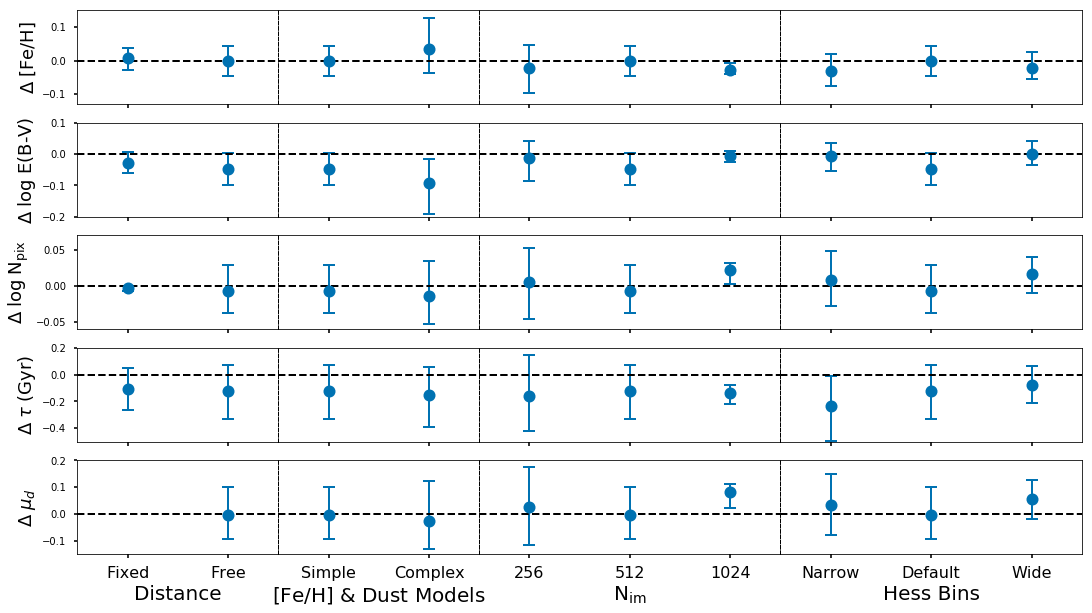

<Figure size 1440x720 with 0 Axes>

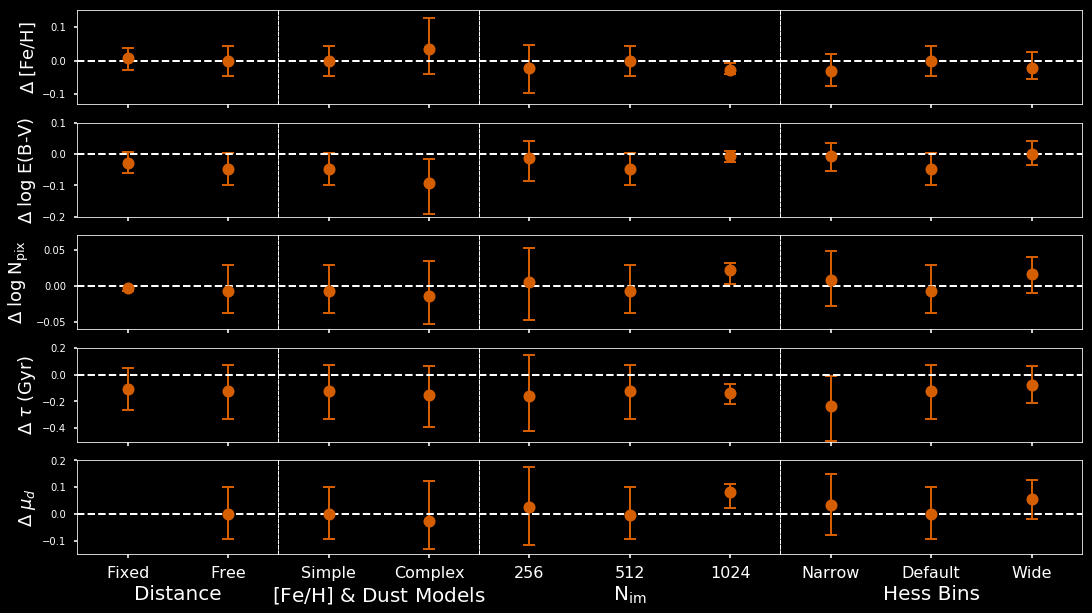

In [27]:
%%savefig_dark_light paper1/ModelChoices.pdf
fig = plt.figure(figsize=(20,10))
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 10), gridspec_kw={'width_ratios': [2,2,3,3], 'wspace': 0.}, sharex='col', sharey='row')
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        a = axes[i,j]
        if j > 0:
            a.spines['left'].set_linestyle('--')
            a.spines['left'].set_linewidth(1.)
            a.spines['left'].set_fill(False)
            a.yaxis.set_visible(False)
        if j < axes.shape[1]-1:
#             a.spines['right'].set_linestyle(':')
            a.spines['right'].set_visible(False)

color = (dark_color if is_dark else light_color) 

# Distance
r = res['mock_33']
r.plot_errorbars(axes=axes[:-1, 0], x=0, offsets=r.true_params, color=color)
r = res['mock_5']
r.plot_errorbars(axes=axes[:, 0], x=1, offsets=r.true_params, color=color)

# # SFH
# r = res['mock_5']
# r.plot_errorbars(axes=axes[:, 1], x=0, offsets=r.true_params, color=color)
# r = res['mock_8']
# np_axes = [axes[0, 1], axes[1, 1]] + [None, None, None, None, None] + [axes[-1, 1], axes[2, 1]]
# r.plot_errorbars(axes=np_axes, x=1, offsets=r.true_params, color=color)

# sig
r = res['mock_5']
r.plot_errorbars(axes=axes[:, 1], x=0, offsets=r.true_params, color=color)
r = res['mock_6']
np_axes = [axes[0, 1], None, axes[1, 1], None] + list(axes[2:, 1])
r.plot_errorbars(axes=np_axes, x=1, offsets=r.true_params, color=color)

# Nim
for i, k in enumerate(['mock_10', 'mock_5', 'mock_11']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 2], x=i, offsets=r.true_params, color=color)

# Hess Bins
for i, k in enumerate(['mock_30', 'mock_5', 'mock_29']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 3], x=i, offsets=r.true_params, color=color)
            
yl_size = 18
xl_size = 20
xt_size = 16
axes[-1, 0].set_xlabel('Distance', fontsize=xl_size)
axes[-1, 0].set_xticks([0, 1])
axes[-1, 0].set_xticklabels(['Fixed', 'Free'], fontsize=xt_size)
axes[-1, 0].set_xlim([-0.5, 1.5])

# axes[-1, 1].set_xlabel('SFH Model', fontsize=xl_size)
# axes[-1, 1].set_xticks([0, 1])
# axes[-1, 1].set_xticklabels(['Tau', 'NonParam'], fontsize=xt_size)
# axes[-1, 1].set_xlim([-0.5, 1.5])

axes[-1, 1].set_xlabel(r'$\mathrm{[Fe/H]}$ & Dust Models', fontsize=xl_size)
axes[-1, 1].set_xticks([0, 1])
axes[-1, 1].set_xticklabels(['Simple', 'Complex'], fontsize=xt_size)
axes[-1, 1].set_xlim([-0.5, 1.5])

axes[-1, 2].set_xlabel(r'$\mathrm{N_{im}}$', fontsize=xl_size)
axes[-1, 2].set_xticks([0, 1, 2])
axes[-1, 2].set_xticklabels([256, 512, 1024], fontsize=xt_size)
axes[-1, 2].set_xlim([-0.5, 2.5])

axes[-1, 3].set_xlabel('Hess Bins', fontsize=xl_size)
axes[-1, 3].set_xticks([0, 1, 2])
axes[-1, 3].set_xticklabels(['Narrow', 'Default', 'Wide'], fontsize=xt_size)
axes[-1, 3].set_xlim([-0.5, 2.5])

for ax in axes.flatten():
    ax.axhline(y=0, ls='--')
for i in range(5):
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    axes[i, 0].set_ylabel(ylabel, fontsize=yl_size)
    
axes[0,0].set_ylim([-0.13, 0.15])
axes[1,0].set_ylim([-0.2, 0.1])
axes[2,0].set_ylim([-0.06, 0.07])
axes[3,0].set_ylim([-0.5, 0.2])
axes[4,0].set_ylim([-0.15, 0.2])

# Figure 6 - Npix

In [61]:
res['mock_52'].df.tail()

niter   nc     eff    logl   logwt  logvol    logz  logzerr      h  \
6476  6477.0  1.0  4.2985 -565.53 -584.39 -16.557 -584.39  0.39353  18.86   
6477  6478.0  1.0  4.2992 -546.76 -565.62 -16.780 -565.62  0.39353  18.86   
6478  6479.0  1.0  4.2998 -533.27 -552.13 -17.068 -552.13  0.39351  18.86   
6479  6480.0  1.0  4.3005 -511.41 -530.27 -17.474 -530.27  0.39353  18.86   
6480  6481.0  1.0  4.3012 -492.27 -511.13 -18.167 -511.13  0.39353  18.86   

      delta_logz      ...       logSFH2  logSFH3  logSFH4    dmod   live  \
6476     75.5600      ...        3.0537   3.6901   3.0936  25.769  False   
6477     56.5660      ...        3.1089   3.3704   3.7683  25.860  False   
6478     42.7880      ...        3.4916   3.0253   3.4688  25.977  False   
6479     20.5270      ...        3.6121   3.5653   2.7058  26.201  False   
6480      1.0986      ...        2.7775   3.7097   3.4693  25.740  False   

       logNpix   log_weights  dynesty_weights  likelihood_weights  \
6476  3.891287 -7.326000e+01     1.526111e-32        1.526111e-32   
6477  3.998357 -5.449000e+01     2.164181e-24        2.164181e-24   
6478  3.895571 -4.100000e+01     1.562882e-18        1.562882e-18   
6479  3.969604 -1.914000e+01     4.870837e-09        4.870837e-09   
6480  3.962170 -4.870856e-09     1.000000e+00        1.000000e+00   

           weights  
6476  1.526111e-32  
6477  2.164181e-24  
6478  1.562882e-18  
6479  4.870837e-09  
6480  1.000000e+00  

[5 rows x 25 columns]

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Npix.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Npix_dark.pdf


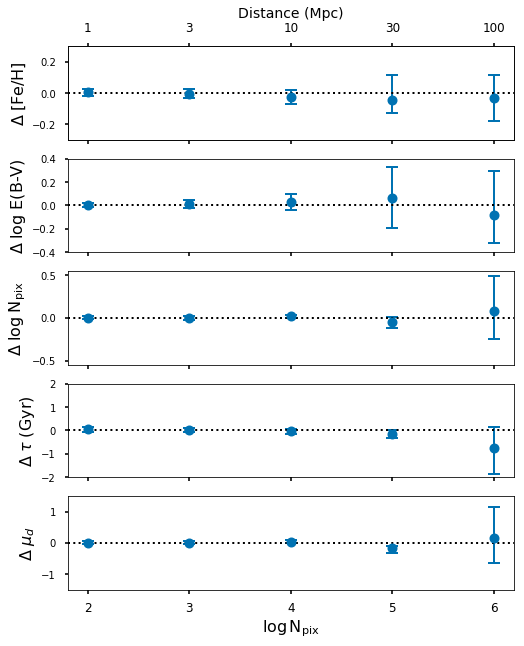

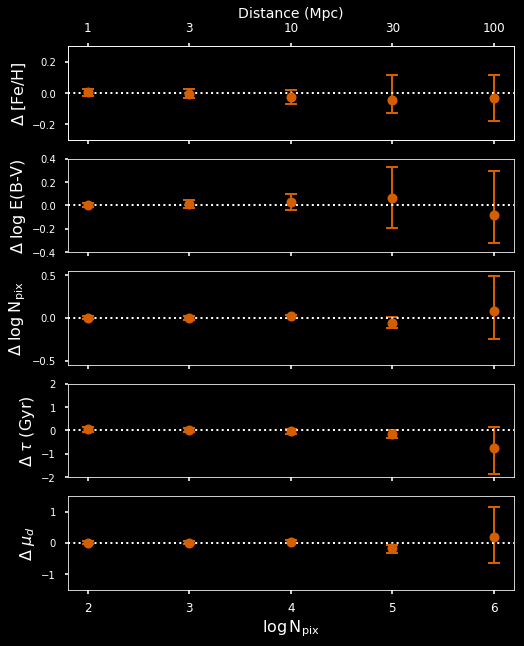

In [58]:
%%savefig_dark_light paper1/Npix.pdf
fig, axes = plt.subplots(nrows=5, figsize=(8,10), sharex=True)
keys = ['mock_55', 'mock_56', 'mock_57', 'mock_58', 'mock_59']
Npixs = np.arange(2, 7)
color = (dark_color if is_dark else light_color)
for i, k in enumerate(keys):
    r = res[k]
    r.plot_errorbars(axes, x=Npixs[i], offsets=r.true_params, color=color, ms=8)

for i, ax in enumerate(axes):
    ax = axes[i]
    ax.axhline(y=0, ls=':')
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)

axes[0].set_ylim([-.3, .3])
ax2 = axes[0].twiny()
ax2.set_xticks([2,3,4,5,6])
ax2.set_xticklabels([1, 3, 10, 30, 100], fontsize=12)
ax2.set_xlabel('Distance (Mpc)')
ax2.set_xlim(axes[0].get_xlim())

axes[1].set_ylim([-.4, .4])
axes[2].set_ylim([-0.55, 0.55])
axes[3].set_ylim([-2, 2])
axes[4].set_ylim([-1.5, 1.5])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$', fontsize=16)
axes[-1].set_xticks([2, 3, 4, 5, 6])
axes[-1].set_xticklabels([2, 3, 4, 5, 6], fontsize=12)

# Figure 7 - Variance

In [35]:
keys = ['mock_5', 'mock_34', 'mock_35', 'mock_36', 'mock_37', 'mock_38', 'mock_39', 'mock_40']
means = np.array([res[k].medians for k in keys])
stds = np.array([res[k].stds for k in keys])

Saving light figure as figures/paper1/Errors.pdf
Saving dark figure as figures_dark/paper1/Errors_dark.pdf


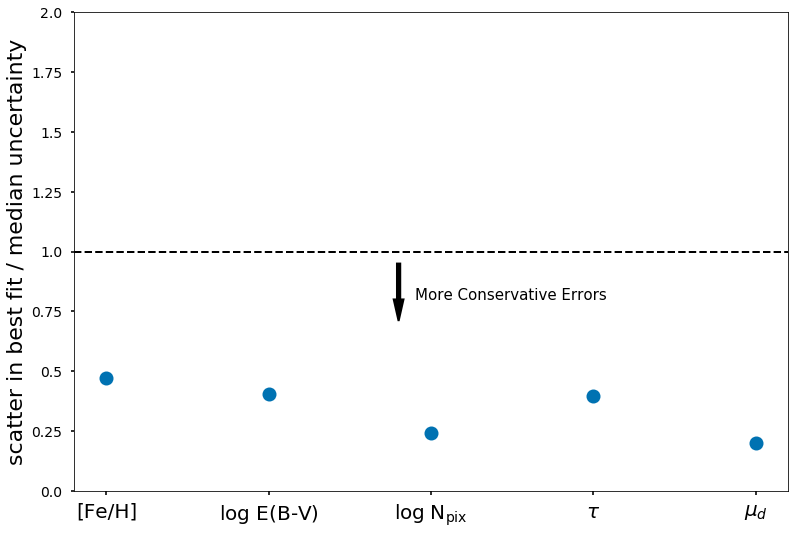

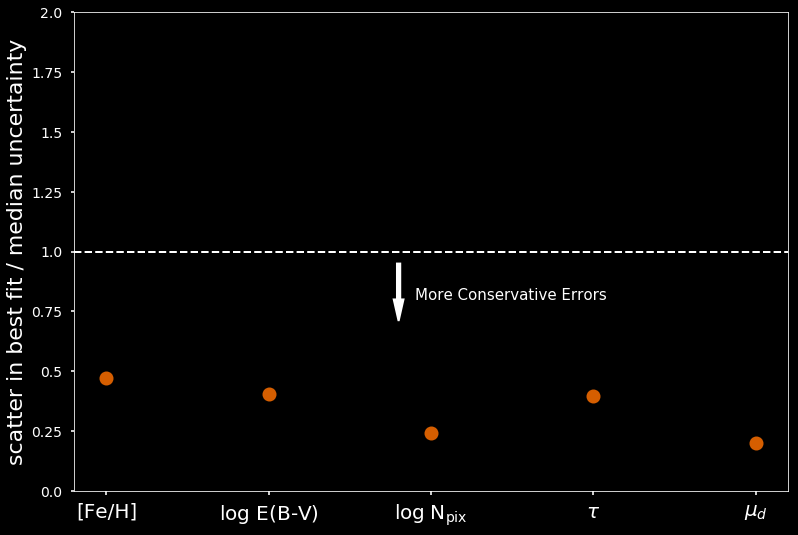

In [39]:
%%savefig_dark_light paper1/Errors.pdf
fig, ax = plt.subplots()
color = (dark_color if is_dark else light_color)
ax.plot(np.std(means, axis=0) / np.median(stds, axis=0), marker='o', ls='', color=color)
ax.arrow(1.8, 0.95, 0, -0.15, width=0.02, color=('w' if is_dark else'k'))
ax.text(1.9, 0.8, 'More Conservative Errors', fontsize=15)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(res['mock_5'].labels, fontsize=20)
ax.axhline(y=1, ls='--')
ax.set_ylim([0,2])
ax.set_ylabel(r'scatter in best fit / median uncertainty', fontsize=22)
ax.set_yticklabels(ax.get_yticks(), fontsize=14)

# Figure 8 - Mismatch

In [78]:
def get_mean_age(sfh_model):
    return np.log10(np.average(10.**sfh_model.ages, weights=sfh_model.SFH))

In [170]:
m = ppy.sfhmodels.TauModel(iso_step=.2)
taus = np.linspace(-2., 50, 50000)
tau_ages = []
for t in tqdm(taus):
    m.set_params(np.array([2.0, t]))
    x = 10.**m.ages
    y = m.SFH
    tau_ages.append(np.log10(np.average(x, weights=(y / y.sum()))))
tau_ages = np.array(tau_ages)
tau_ages[np.isnan(tau_ages)] = 10.2

  2%|▏         | 982/50000 [00:00<00:04, 9816.19it/s]/Users/bcook/pCMDs/pixcmd/pcmdpy/pcmdpy/galaxy/sfhmodels.py:245: RuntimeWarning: overflow encountered in exp
  SFH_term = np.diff(np.exp(ages_linear/tau))
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:1174: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/Users/bcook/pCMDs/pixcmd/pcmdpy/pcmdpy/galaxy/sfhmodels.py:246: RuntimeWarning: invalid value encountered in true_divide
  return Npix * SFH_term / np.sum(SFH_term)
100%|██████████| 50000/50000 [00:03<00:00, 14258.79it/s]


In [171]:
def get_approx_tau(age):
    return taus[np.argmin(np.abs(tau_ages - age))]

In [172]:
ages = []
taus_np = []
m = res['mock_8'].sfh_model.copy()
for params in res['mock_8'].equal_samples[:, 2:-2]:
    m.set_params(params)
    ages.append(get_mean_age(m))
    taus_np.append(get_approx_tau(ages[-1]))

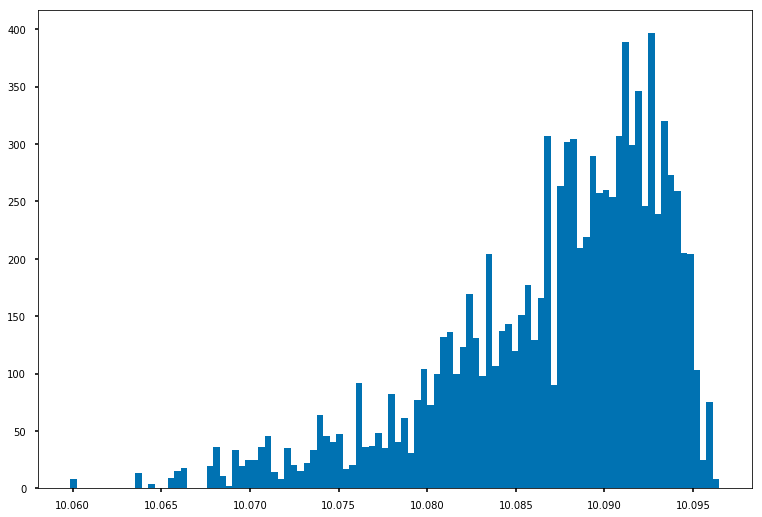

In [173]:
plt.hist(ages, bins=100);

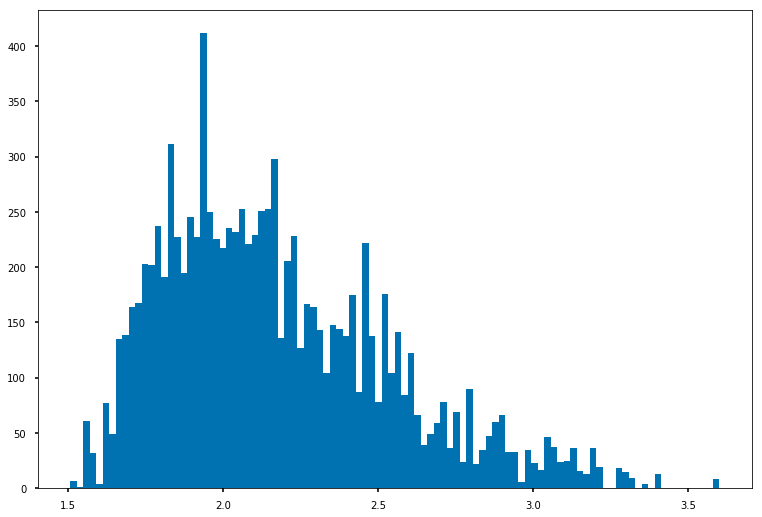

In [174]:
plt.hist(taus_np, bins=100);

In [175]:
med_tau_np = np.percentile(taus_np, 50.)
upper_tau_np = np.percentile(taus_np, 84.)
lower_tau_np = np.percentile(taus_np, 16.)

In [176]:
med_tau_np

2.109122182443649

In [177]:
upper_tau_np

2.5355307106142115

In [178]:
lower_tau_np

1.817916358327166

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Model_Mismatch.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Model_Mismatch_dark.pdf


<Figure size 864x720 with 0 Axes>

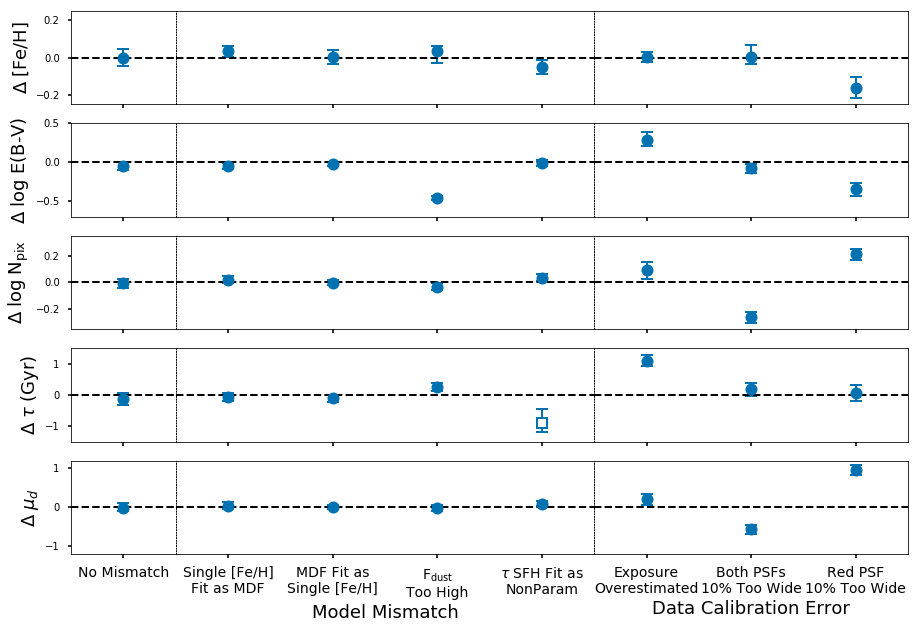

<Figure size 864x720 with 0 Axes>

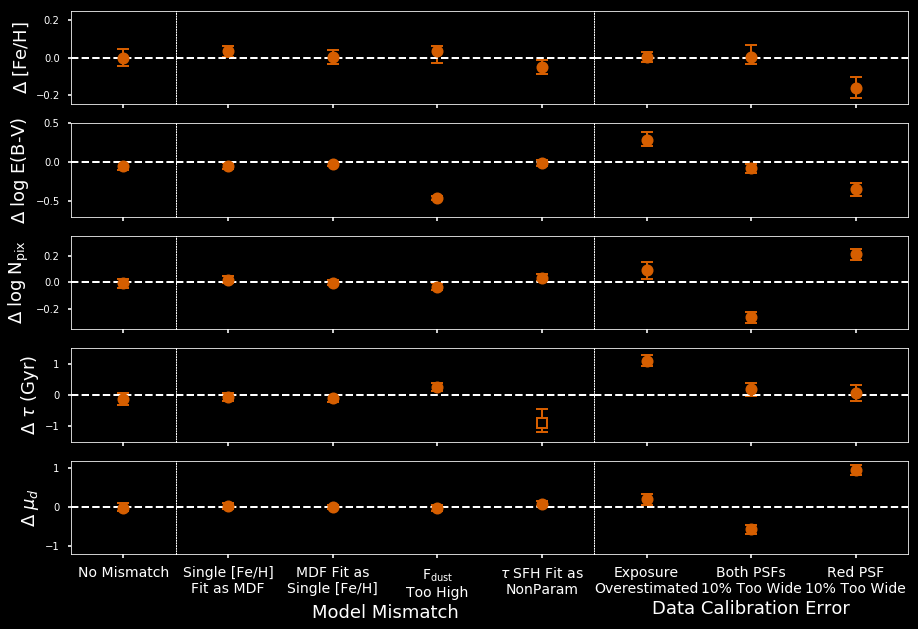

In [136]:
%%savefig_dark_light paper1/Model_Mismatch.pdf
fig = plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10), gridspec_kw={'width_ratios': [1,4,3], 'wspace': 0.}, sharex='col', sharey='row')
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        a = axes[i,j]
        if j > 0:
            a.spines['left'].set_linestyle(':')
            a.spines['left'].set_linewidth(1.)
            a.spines['left'].set_fill(False)
            a.yaxis.set_visible(False)
        if j < axes.shape[1]-1:
#             a.spines['right'].set_linestyle(':')
            a.spines['right'].set_visible(False)
plt.subplots_adjust(wspace=0.)

color = (dark_color if is_dark else light_color) 
face = ('k' if is_dark else 'w')

for i, k in enumerate(['mock_5']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 0], x=i, offsets=res['mock_5'].true_params, color=color)

# Model Complexity
for i, k in enumerate(['mismatch_1', 'mismatch_2', 'mismatch_5']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 1], x=i, offsets=res['mock_5'].true_params, color=color)

r = res['mock_8']
np_axes = [axes[0, 1], axes[1, 1]] + [None, None, None, None, None] + [axes[-1, 1], axes[2, 1]]
r.plot_errorbars(axes=np_axes, x=3, offsets=r.true_params, color=color)

axes[3,1].errorbar(x=[3], y=[med_tau_np - 3.0], yerr=[[med_tau_np-lower_tau_np], [upper_tau_np-med_tau_np]], marker='s', mfc=face,
                  ms=10, capsize=6, color=color)

# Data Calibration
for i, k in enumerate(['mismatch_7', 'mismatch_8', 'mismatch_9']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 2], x=i, offsets=res['mock_5'].true_params, color=color)

for i in range(5):
    ax = axes[i, 0]
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=18)

for ax in axes.flatten():
    ax.axhline(y=0, ls='--')

xts = 14
ax = axes[-1, 0]
ax.set_xticks([0])
ax.set_xlabel('')
ax.set_xticklabels(['No Mismatch'], fontsize=xts)
ax.set_xlim([-0.5, 0.5])

ax = axes[-1, 1]
ax.set_xticks([0, 1, 2, 3])
ax.set_xlabel('Model Mismatch', fontsize=18)
ax.set_xticklabels(['Single [Fe/H]\nFit as MDF',
                    'MDF Fit as\nSingle [Fe/H]',
                    r'$\mathrm{F_{dust}}$' + '\nToo High',
                   r'$\tau$ SFH Fit as' + '\nNonParam'], fontsize=xts)
ax.set_xlim([-0.5, 3.5])

ax = axes[-1, 2]
ax.set_xticks([0, 1, 2])
ax.set_xlabel('Data Calibration Error', fontsize=18)
ax.set_xticklabels(['Exposure\nOverestimated',
                    'Both PSFs\n10% Too Wide',
                    'Red PSF\n10% Too Wide'], fontsize=xts)
ax.set_xlim([-0.5, 2.5])

axes[0,0].set_ylim([-0.25, 0.25])
axes[1,0].set_ylim([-0.7, 0.5])
axes[2,0].set_ylim([-0.35, 0.35])
axes[3,0].set_ylim([-1.5, 1.5])
axes[4,0].set_ylim([-1.2, 1.2])

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


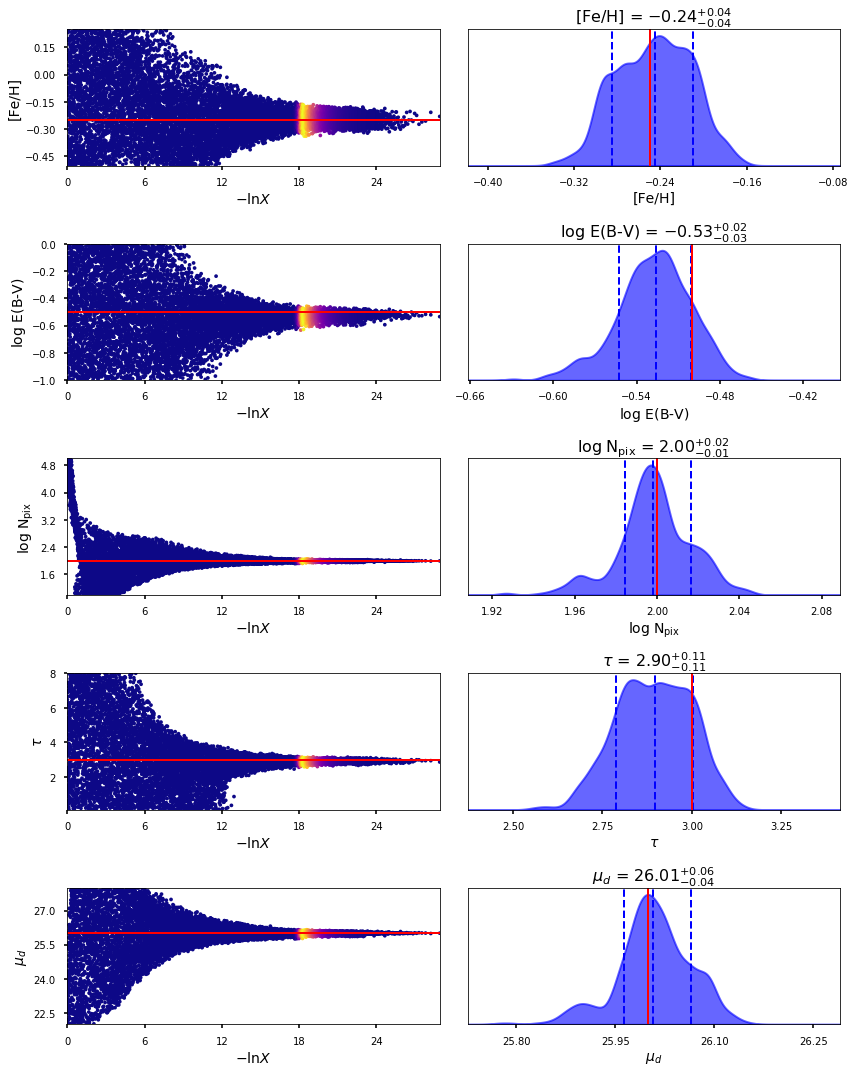

In [39]:
res['mismatch_2'].plot_trace();
plt.tight_layout()

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


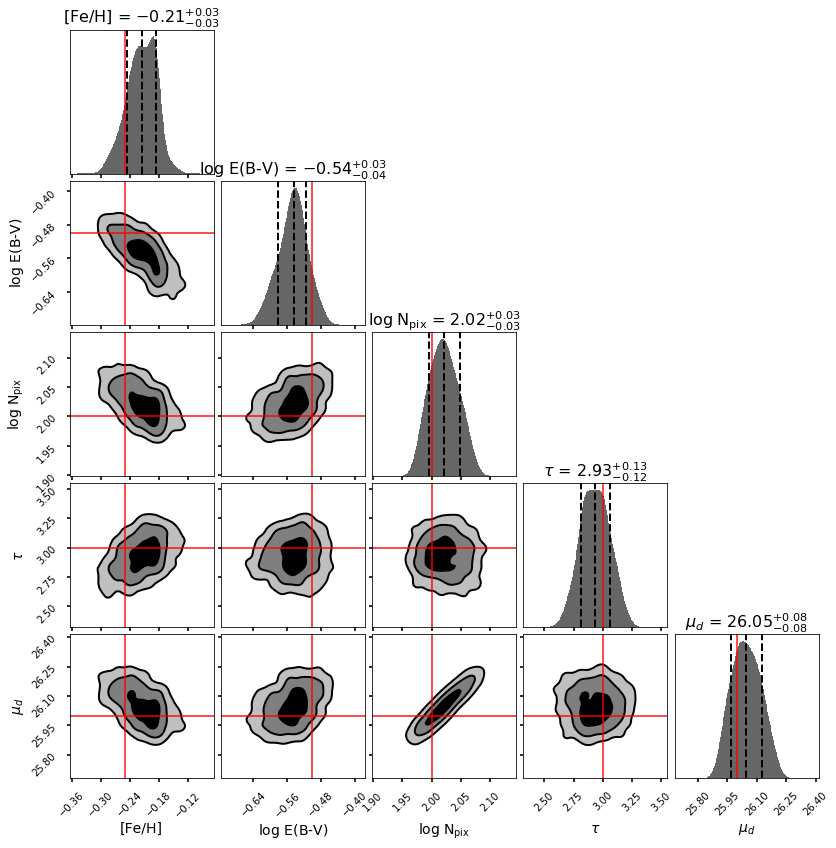

In [36]:
res['mismatch_1'].plot_corner();

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


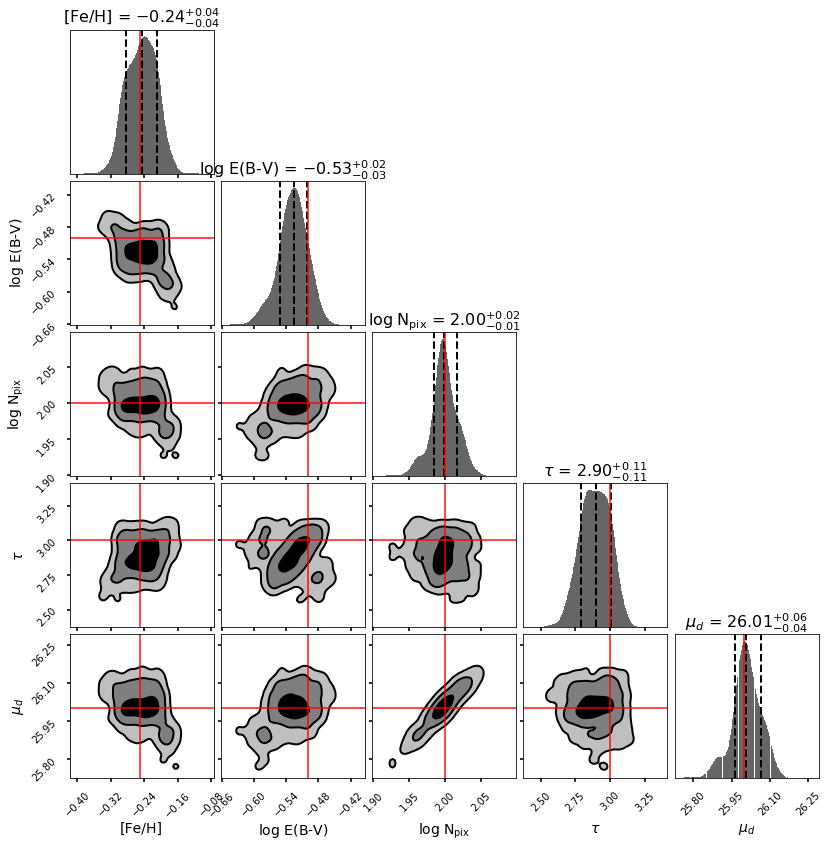

In [37]:
res['mismatch_2'].plot_corner();

# Figure A2 - Likelihood Ceiling

In [34]:
r = res['mock_5']
logls = np.linspace(r.df.logl.max(), -1100., 100)
means = np.array([r.get_means(max_logl=l) for l in tqdm(logls)])
stds = np.array([r.get_stds(max_logl=l) for l in tqdm(logls)])

100%|██████████| 100/100 [00:38<00:00,  2.60it/s]


Saving light figure as figures/paper1/Likelihood_Ceiling.pdf
Saving dark figure as figures_dark/paper1/Likelihood_Ceiling_dark.pdf


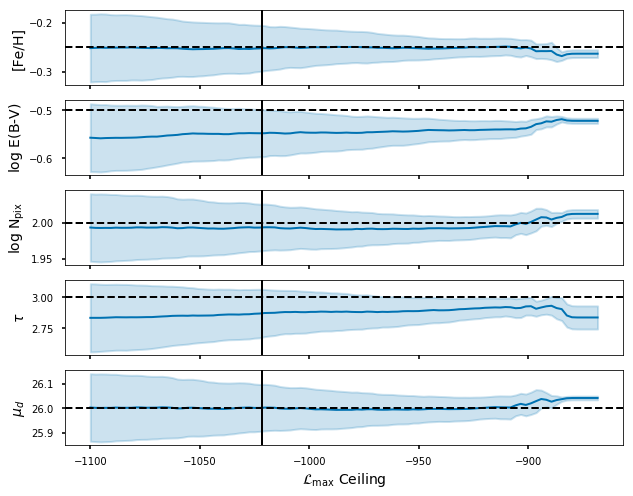

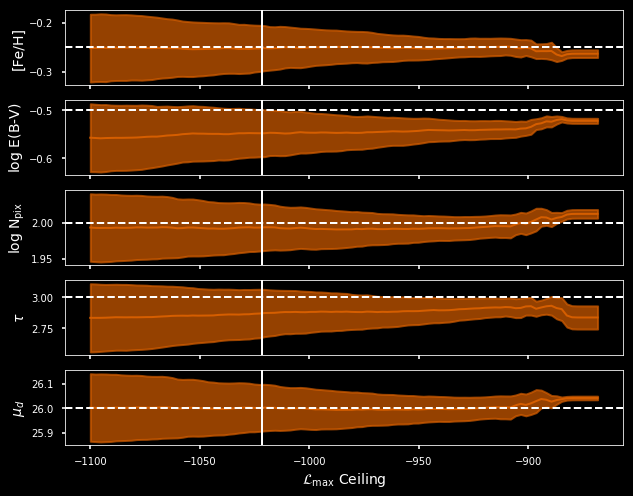

In [35]:
%%savefig_dark_light paper1/Likelihood_Ceiling.pdf
fig, axes = plt.subplots(nrows=5, figsize=(10, 8), sharex=True)
for i in range(5):
    axes[i].plot(logls, means[:, i], color=(dark_color if is_dark else light_color))
    axes[i].fill_between(logls, y1=means[:,i]+stds[:,i], y2=means[:,i]-stds[:,i], alpha=(0.7 if is_dark else 0.2), zorder=-1, color=(dark_color if is_dark else light_color))
    axes[i].axvline(x=res['mock_5'].max_logl, ls='-')
    axes[i].axhline(y=r.true_params[i], ls='--')
    axes[i].set_ylabel(r.labels[i])
axes[-1].set_xlabel(r'$\mathcal{L}_\mathrm{max}$ Ceiling')
# plt.savefig('figures/paper1/Likelihood_Cutoffs.pdf')

# Other Plots

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


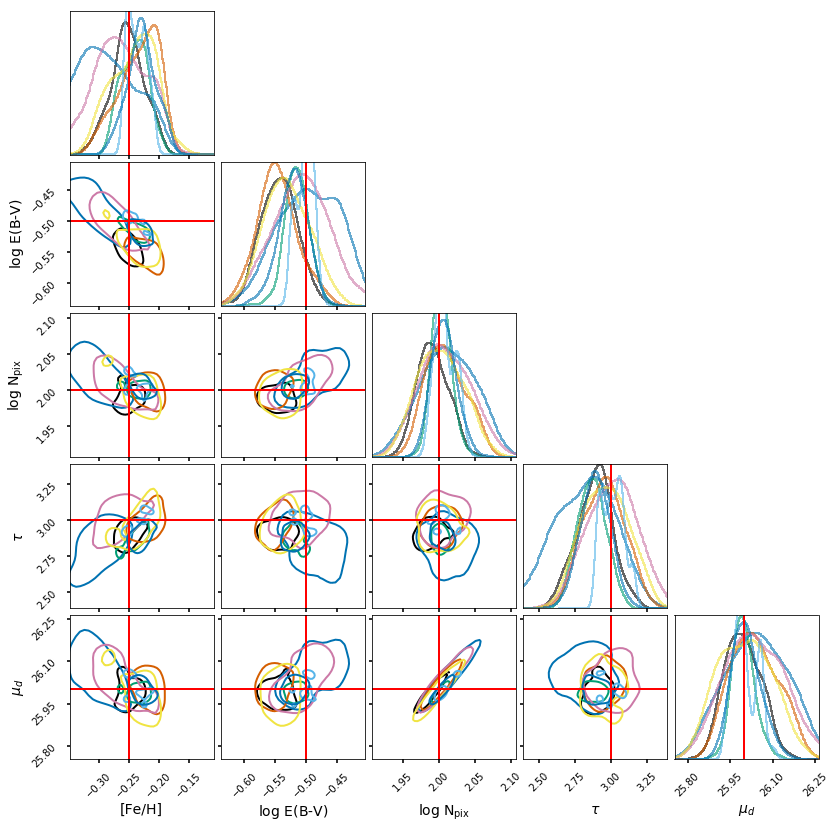

In [39]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(34, 41)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


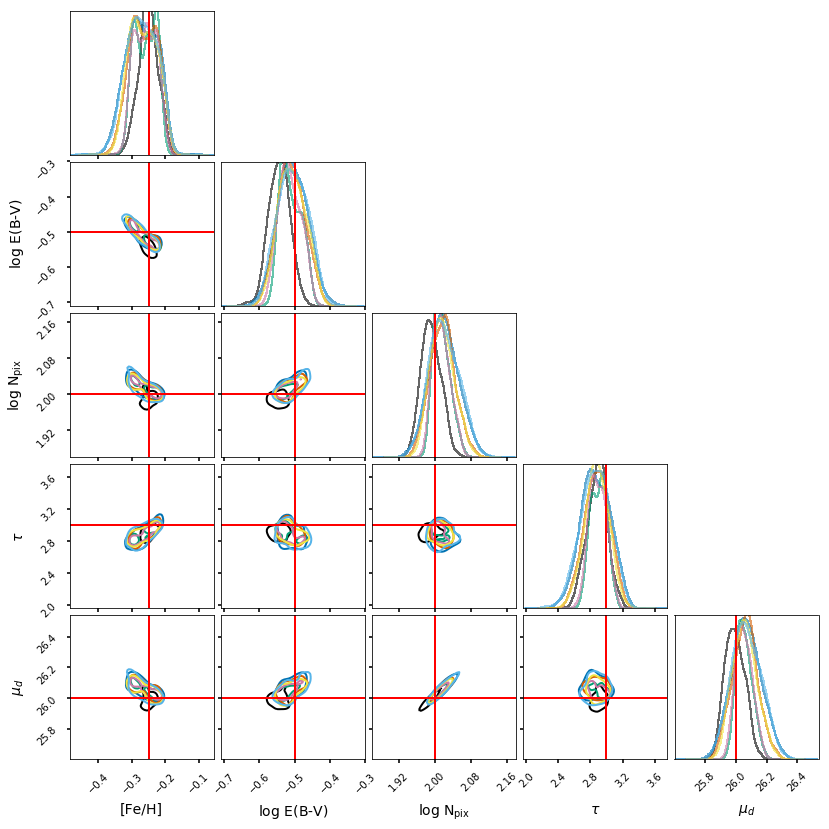

In [45]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(18, 24)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)